<a href="https://colab.research.google.com/github/cantaruttim/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
dataset = pd.read_csv('diabetes.rwrite1.csv', encoding= "utf_8", delimiter=" ")
dataset

age       sex       bmi       map        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu    y  
0   -0.002592  0.019908 -0.017646  151  
1   -0.039493 -0.068330 -0.092204   75  
2   -0.002592  0.002864 -0.025930  141  
3    0.034309  0.022692 -0.009362  206  
4   -0.002592 -0.031991 -0.046641  135  
..        ...       ...       ...  ...  
437 -0.002592  0.031193  0.007207  178  
438  0.034309 -0.018118  0.044485  104  
439 -0.011080 -0.046879  0.015491  132  
440  0.026560  0.044528 -0.025930  220  
441 -0.039493 -0.004220  0.003064   57  

[442 rows x 11 columns]

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   map     442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  y       442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [20]:
dataset.isnull().sum()

age    0
sex    0
bmi    0
map    0
tc     0
ldl    0
hdl    0
tch    0
ltg    0
glu    0
y      0
dtype: int64

In [21]:
dataset.columns

Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'y'],
      dtype='object')

# **Projeto Diabetes**

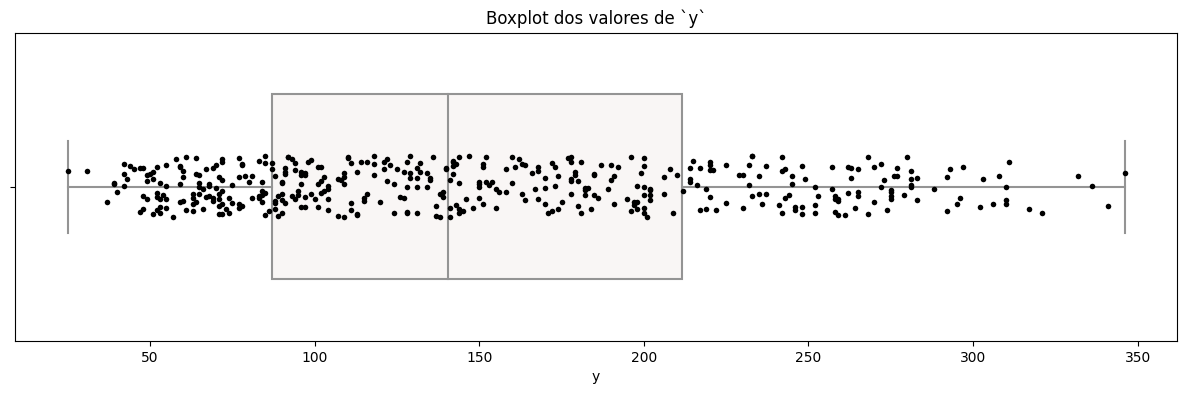

In [22]:
plt.figure(figsize=(15,4))

sns.boxplot(x="y", data=dataset,
            whis=[0, 100], width=.6, palette="vlag");

# Add in points to show each observation
sns.stripplot(x="y", data=dataset,
              size=4, color="0", linewidth=0);

plt.title("Boxplot dos valores de `y`")
plt.show()

In [23]:
dataset[dataset['y'] > 150] # diabético

age       sex       bmi       map        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
12   0.016281 -0.044642 -0.028840 -0.009113 -0.004321 -0.009769  0.044958   
13   0.005383  0.050680 -0.001895  0.008101 -0.004321 -0.015719 -0.002903   
..        ...       ...       ...       ...       ...       ...       ...   
428  0.048974  0.050680  0.088642  0.087287  0.035582  0.021546 -0.024993   
430 -0.009147 -0.044642 -0.056863 -0.050428  0.021822  0.045345 -0.028674   
432  0.009016 -0.044642  0.055229 -0.005671  0.057597  0.044719 -0.002903   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   

          tch       ltg       glu    y  
0   -0.002592  0.019908 -0.017646  151  
3    0.034309  0.022692 -0.009362  206  
9   -0.002592  0.067736 -0.013504  310  
12  -0.039493 -0.030751 -0.042499  179  
13  -0.002592  0.038393 -0.013504  185  
..        ...       ...       ...  ...  
428  0.034309  0.066048  0.131470  310  
430  0.034309 -0.009919 -0.017646  183  
432  0.023239  0.055684  0.106617  173  
437 -0.002592  0.031193  0.007207  178  
440  0.026560  0.044528 -0.025930  220  

[200 rows x 11 columns]

In [24]:
dataset[(dataset['y'] >= 100) & (dataset['y'] <= 150)] # prédiabético

age       sex       bmi       map        tc       ldl       hdl  \
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
..        ...       ...       ...       ...       ...       ...       ...   
420  0.023546 -0.044642 -0.036385  0.000068  0.001183  0.034698 -0.043401   
424  0.001751  0.050680  0.011039 -0.019442 -0.016704 -0.003819 -0.047082   
426  0.030811  0.050680 -0.034229  0.043677  0.057597  0.068831 -0.032356   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   

          tch       ltg       glu    y  
2   -0.002592  0.002864 -0.025930  141  
4   -0.002592 -0.031991 -0.046641  135  
6   -0.039493 -0.062913 -0.038357  138  
8   -0.002592 -0.014956  0.011349  110  
10  -0.076395 -0.062913 -0.034215  101  
..        ...       ...       ...  ...  
420  0.034309 -0.033249  0.061054  146  
424  0.034309  0.024053  0.023775  111  
426  0.057557  0.035462  0.085907  120  
438  0.034309 -0.018118  0.044485  104  
439 -0.011080 -0.046879  0.015491  132  

[95 rows x 11 columns]

In [25]:
dataset[(dataset['y'] >= 69) & (dataset['y'] <= 99)] # normal

age       sex       bmi       map        tc       ldl       hdl  \
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
11   0.027178  0.050680  0.017506 -0.033214 -0.007073  0.045972 -0.065491   
18  -0.038207 -0.044642 -0.010517 -0.036656 -0.037344 -0.019476 -0.028674   
27  -0.023677 -0.044642  0.059541 -0.040099 -0.042848 -0.043589  0.011824   
..        ...       ...       ...       ...       ...       ...       ...   
406 -0.056370 -0.044642 -0.080575 -0.084857 -0.037344 -0.037013  0.033914   
418  0.009016 -0.044642 -0.024529 -0.026328  0.098876  0.094196  0.070730   
423  0.009016  0.050680 -0.039618  0.028758  0.038334  0.073529 -0.072854   
429 -0.041840 -0.044642 -0.033151 -0.022885  0.046589  0.041587  0.056003   
433 -0.027310 -0.044642 -0.060097 -0.029771  0.046589  0.019980  0.122273   

          tch       ltg       glu   y  
1   -0.039493 -0.068330 -0.092204  75  
5   -0.076395 -0.041180 -0.096346  97  
11   0.071210 -0.096433 -0.059067  69  
18  -0.002592 -0.018118 -0.017646  97  
27  -0.039493 -0.015998  0.040343  85  
..        ...       ...       ...  ..  
406 -0.039493 -0.056158 -0.137767  72  
418 -0.002592 -0.021394  0.007207  84  
423  0.108111  0.015567 -0.046641  91  
429 -0.024733 -0.025952 -0.038357  94  
433 -0.039493 -0.051401 -0.009362  72  

[81 rows x 11 columns]

In [26]:
dataset[dataset['y'] < 69] # hipoglicemia

age       sex       bmi       map        tc       ldl       hdl  \
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
20  -0.049105 -0.044642 -0.056863 -0.043542 -0.045599 -0.043276  0.000779   
21  -0.085430  0.050680 -0.022373  0.001215 -0.037344 -0.026366  0.015505   
22  -0.085430 -0.044642 -0.004050 -0.009113 -0.002945  0.007767  0.022869   
31  -0.023677 -0.044642 -0.065486 -0.081414 -0.038720 -0.053610  0.059685   
..        ...       ...       ...       ...       ...       ...       ...   
431  0.070769  0.050680 -0.030996  0.021872 -0.037344 -0.047034  0.033914   
434  0.016281 -0.044642  0.001339  0.008101  0.005311  0.010899  0.030232   
435 -0.012780 -0.044642 -0.023451 -0.040099 -0.016704  0.004636 -0.017629   
436 -0.056370 -0.044642 -0.074108 -0.050428 -0.024960 -0.047034  0.092820   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu   y  
7    0.017703 -0.035817  0.003064  63  
20  -0.039493 -0.011901  0.015491  68  
21  -0.039493 -0.072128 -0.017646  49  
22  -0.039493 -0.061177 -0.013504  68  
31  -0.076395 -0.037128 -0.042499  59  
..        ...       ...       ...  ..  
431 -0.039493 -0.014956 -0.001078  66  
434 -0.039493 -0.045421  0.032059  49  
435 -0.002592 -0.038459 -0.038357  64  
436 -0.076395 -0.061177 -0.046641  48  
441 -0.039493 -0.004220  0.003064  57  

[66 rows x 11 columns]

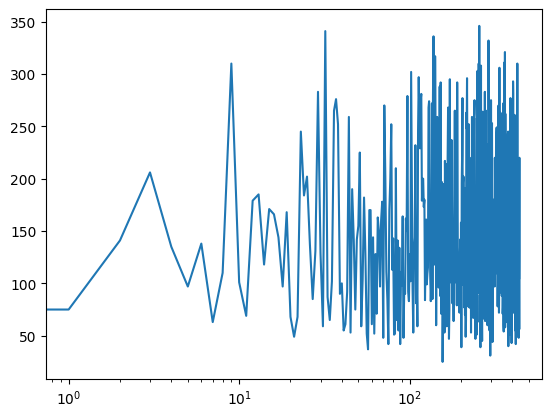

In [27]:
dataset['y'].plot(logx = True);

In [28]:
dataset[['tc', 'ldl']]

tc       ldl
0   -0.044223 -0.034821
1   -0.008449 -0.019163
2   -0.045599 -0.034194
3    0.012191  0.024991
4    0.003935  0.015596
..        ...       ...
437 -0.005697 -0.002566
438  0.049341  0.079165
439 -0.037344 -0.013840
440  0.016318  0.015283
441  0.083740  0.027809

[442 rows x 2 columns]

In [29]:
dataset.iloc[:, 4]
print(dataset.iloc[:, 4].shape)

(442,)


In [30]:
dataset.iloc[:, 5]
print(dataset.iloc[:, 5].shape)

(442,)


In [31]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 4].values
y = dataset.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Reshaping data

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [32]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

Coeficiente r²: 0.8422340486802888 



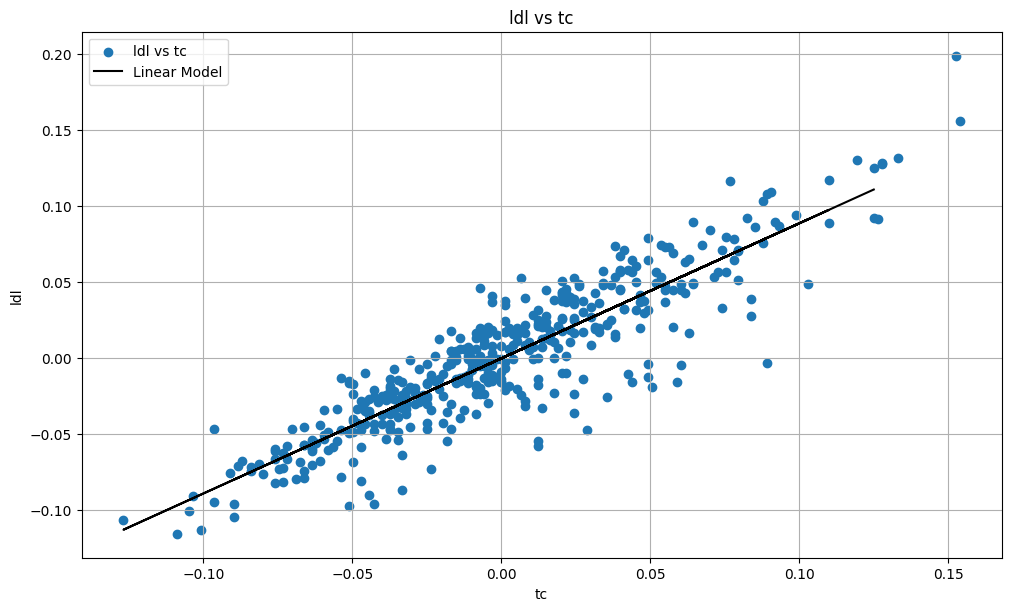

In [33]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r²: {r_squared}', '\n')

##### GRÁFICO #######
### Vamos verificar a linearidade de ldl com tc

f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X, y, marker = 'o',
           label = 'ldl vs tc')
ax.plot(X_test, pred, 'black', label = 'Linear Model')

ax.set_xlabel('tc')
ax.set_ylabel('ldl')
ax.set_title("ldl vs tc")

ax.grid(True)
ax.legend(loc = "upper left");
plt.show()

In [34]:
reg.coef_

array([[0.88818032]])

In [35]:
reg.intercept_

array([-0.00031262])

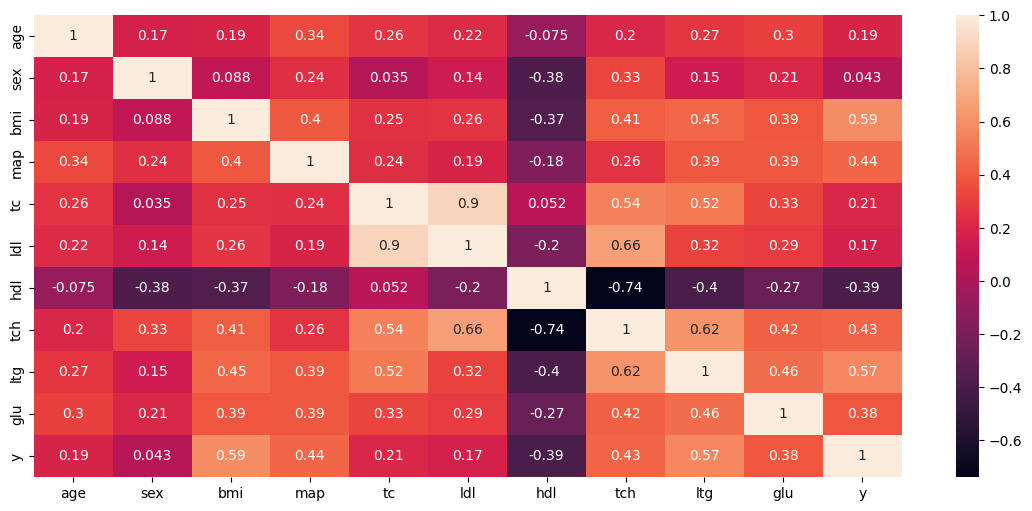

In [36]:
plt.figure(figsize=(14,6))
sns.heatmap(dataset.corr(), annot=True);

In [43]:
X2 = dataset[['bmi', 'ltg']]

In [44]:
X2 = X2.iloc[:, 0:2].values

In [45]:
dataset['glu'].values

array([-0.01764613, -0.09220405, -0.02593034, -0.00936191, -0.04664087,
       -0.09634616, -0.03835666,  0.00306441,  0.01134862, -0.01350402,
       -0.03421455, -0.05906719, -0.04249877, -0.01350402, -0.07563562,
       -0.04249877,  0.02791705, -0.0010777 , -0.01764613, -0.05492509,
        0.01549073, -0.01764613, -0.01350402,  0.13561183, -0.05492509,
       -0.03421455, -0.0052198 ,  0.04034337, -0.05492509,  0.05276969,
       -0.00936191, -0.04249877,  0.02791705,  0.00306441, -0.06735141,
        0.01963284, -0.02593034, -0.0052198 ,  0.02377494,  0.00306441,
        0.09419076, -0.00936191, -0.03421455,  0.07348023, -0.01764613,
       -0.05078298, -0.08806194, -0.08391984, -0.02178823, -0.01350402,
        0.00720652, -0.02178823, -0.01350402,  0.04862759,  0.00720652,
        0.00720652, -0.01764613, -0.06735141, -0.05078298,  0.01963284,
       -0.03421455,  0.01963284, -0.02593034, -0.07149352,  0.01134862,
        0.01549073,  0.01963284,  0.00306441,  0.00306441,  0.01

In [46]:
y2 = dataset.iloc[:, 10].values
y2

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144,  97, 168,  68,  49,  68, 245, 184, 202,
       137,  85, 131, 283, 129,  59, 341,  87,  65, 102, 265, 276, 252,
        90, 100,  55,  61,  92, 259,  53, 190, 142,  75, 142, 155, 225,
        59, 104, 182, 128,  52,  37, 170, 170,  61, 144,  52, 128,  71,
       163, 150,  97, 160, 178,  48, 270, 202, 111,  85,  42, 170, 200,
       252, 113, 143,  51,  52, 210,  65, 141,  55, 134,  42, 111,  98,
       164,  48,  96,  90, 162, 150, 279,  92,  83, 128, 102, 302, 198,
        95,  53, 134, 144, 232,  81, 104,  59, 246, 297, 258, 229, 275,
       281, 179, 200, 200, 173, 180,  84, 121, 161,  99, 109, 115, 268,
       274, 158, 107,  83, 103, 272,  85, 280, 336, 281, 118, 317, 235,
        60, 174, 259, 178, 128,  96, 126, 288,  88, 292,  71, 197, 186,
        25,  84,  96, 195,  53, 217, 172, 131, 214,  59,  70, 220, 268,
       152,  47,  74, 295, 101, 151, 127, 237, 225,  81, 151, 10

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)

# Reshaping data

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## Treinando um Regressor Linear

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2, y2)

LinearRegression()

In [49]:
pred = reg.predict(X_test)

In [50]:
regressor.score(X2, y2)

0.4594852440167805

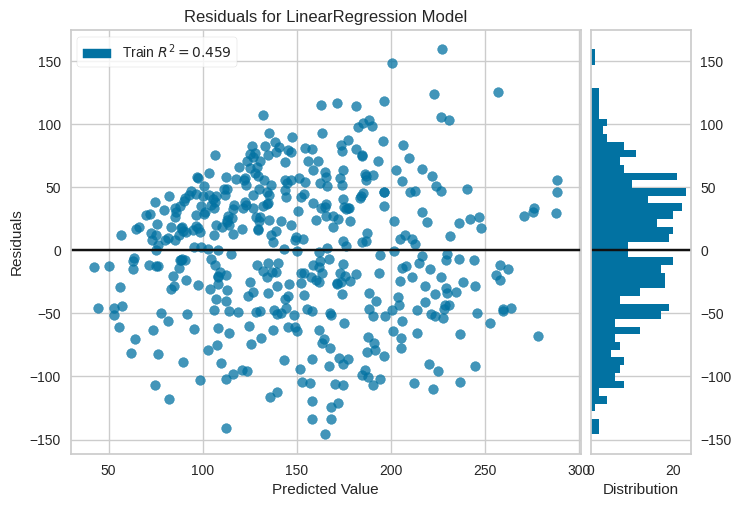

In [51]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor)
visualizador.fit(X2, y2)
visualizador.poof() ;

## Treinando um Elastic Net

In [52]:
from sklearn.linear_model import ElasticNet

elastic_regr = ElasticNet(random_state=0).fit(X2, y2)

In [ ]:
elastic_pred = reg.predict(X_test)
elastic_pred

In [55]:
elastic_regr.score(X2, y2)

0.004545720296209921

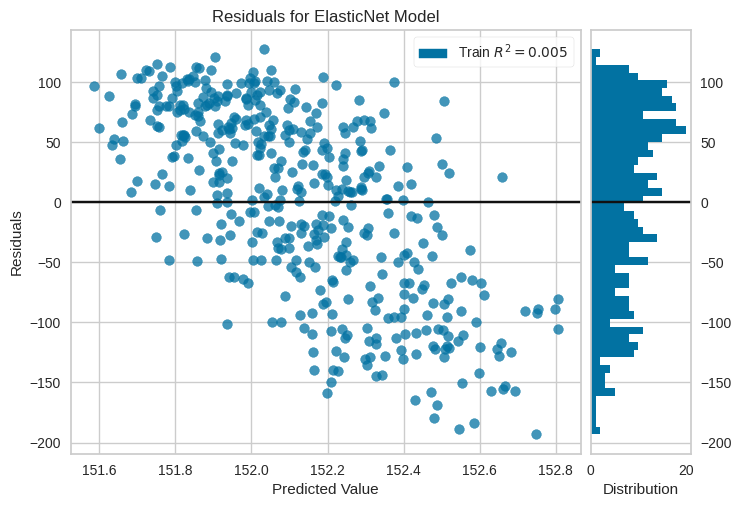

In [56]:
visualizador = ResidualsPlot(elastic_regr)
visualizador.fit(X2, y2)
visualizador.poof() ;

# **Agrupamento**

-- Vamos encontrar os pacientes semelhantes para esse conjunto de dados

In [57]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [58]:
dataset.head()

age       sex       bmi       map        tc       ldl       hdl  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

        tch       ltg       glu    y  
0 -0.002592  0.019908 -0.017646  151  
1 -0.039493 -0.068330 -0.092204   75  
2 -0.002592  0.002864 -0.025930  141  
3  0.034309  0.022692 -0.009362  206  
4 -0.002592 -0.031991 -0.046641  135

In [59]:
X = dataset.iloc[:, 0:10].values # todas as colunas

agrupamento = KMeans(n_clusters=3, random_state=1)
agrupamento.fit(X)

dataset['Groups'] = agrupamento.labels_
dataset.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


age       sex       bmi       map        tc       ldl       hdl  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

        tch       ltg       glu    y  Groups  
0 -0.002592  0.019908 -0.017646  151       2  
1 -0.039493 -0.068330 -0.092204   75       1  
2 -0.002592  0.002864 -0.025930  141       2  
3  0.034309  0.022692 -0.009362  206       2  
4 -0.002592 -0.031991 -0.046641  135       1

In [60]:
np.unique(agrupamento.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([122, 161, 159]))

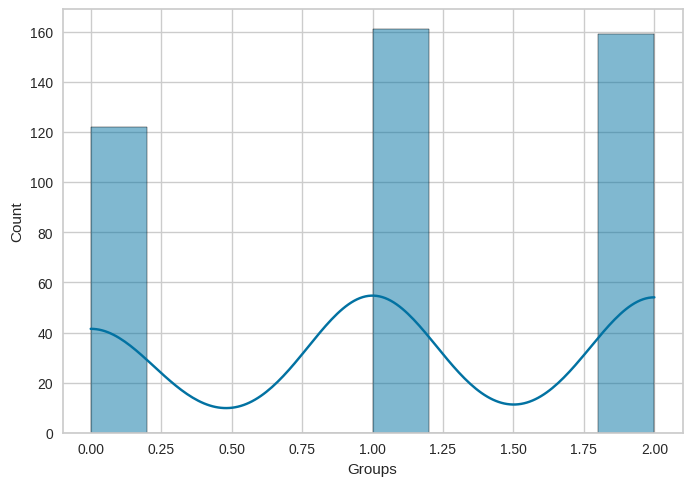

In [66]:
import seaborn as sns

sns.histplot(dataset['Groups'], kde = True);
# sns.histplot(dataset['Groups'], kde = True, stat = 'probability');

### Visualização

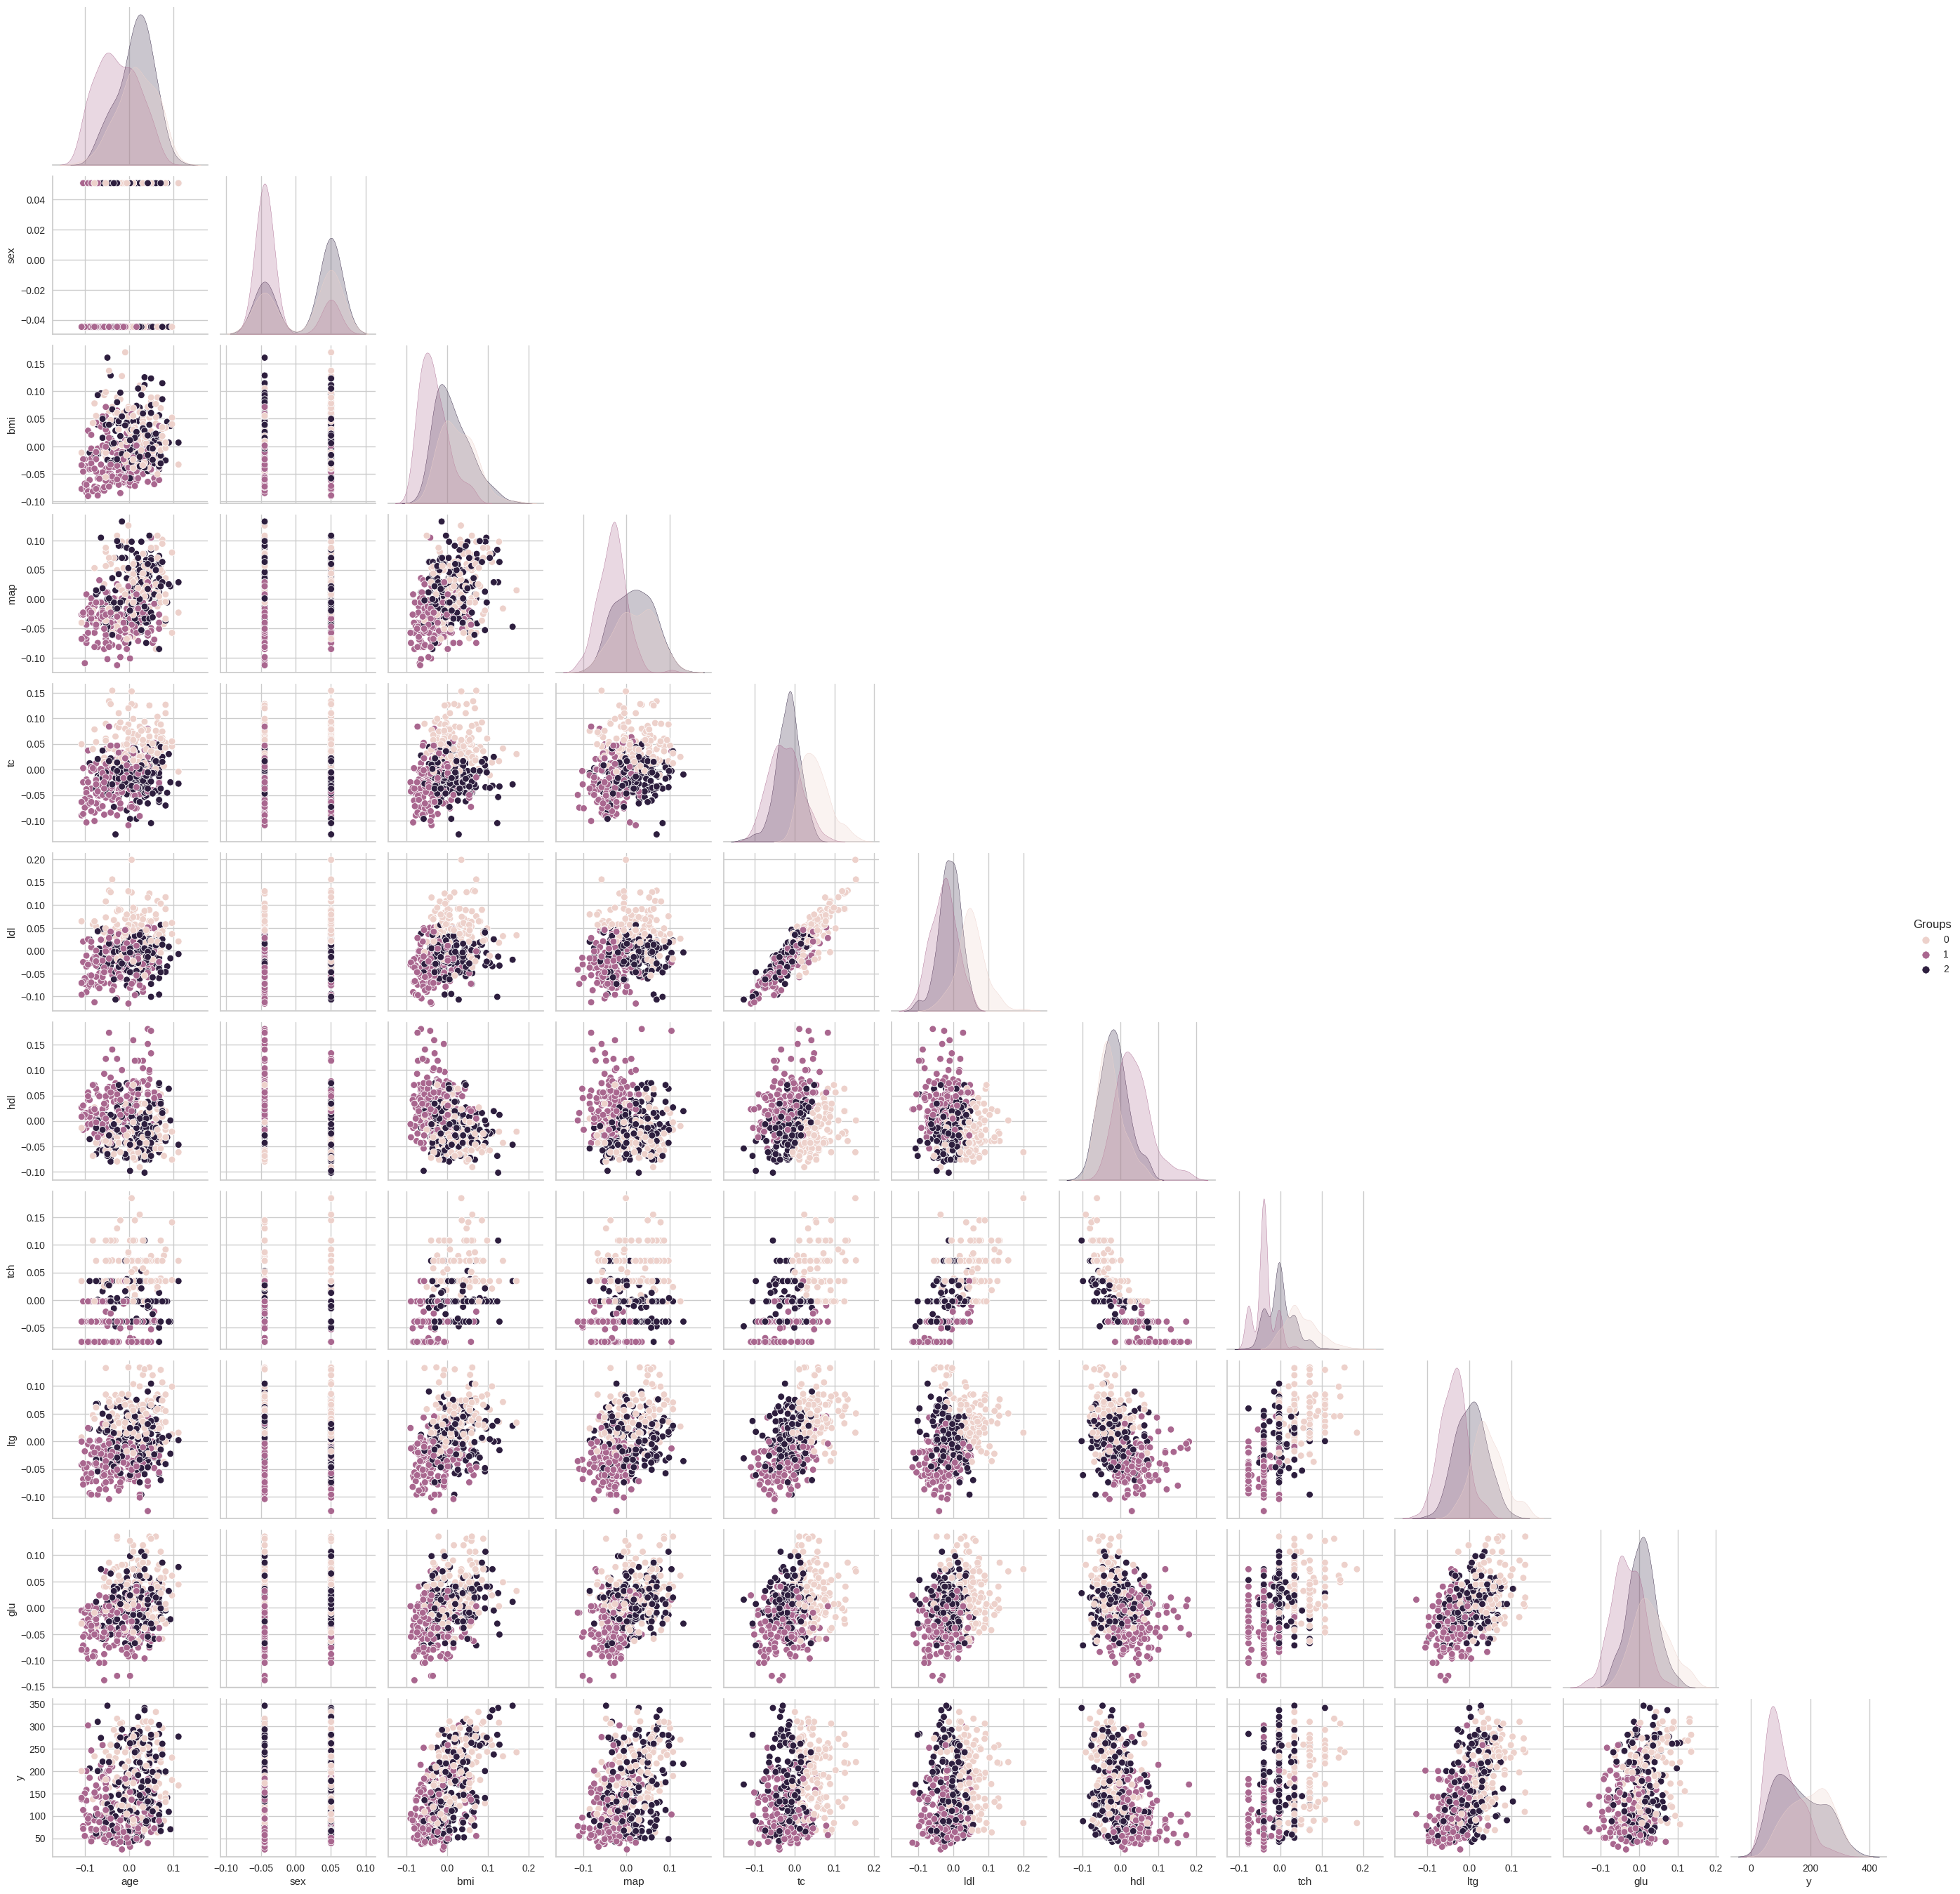

In [86]:
sns.pairplot(dataset, hue="Groups",  corner=True);

In [87]:
colesterol = dataset[['tc', 'ldl', 'hdl', 'tch', 'glu', 'y', 'Groups']]
colesterol

tc       ldl       hdl       tch       glu    y  Groups
0   -0.044223 -0.034821 -0.043401 -0.002592 -0.017646  151       2
1   -0.008449 -0.019163  0.074412 -0.039493 -0.092204   75       1
2   -0.045599 -0.034194 -0.032356 -0.002592 -0.025930  141       2
3    0.012191  0.024991 -0.036038  0.034309 -0.009362  206       2
4    0.003935  0.015596  0.008142 -0.002592 -0.046641  135       1
..        ...       ...       ...       ...       ...  ...     ...
437 -0.005697 -0.002566 -0.028674 -0.002592  0.007207  178       2
438  0.049341  0.079165 -0.028674  0.034309  0.044485  104       0
439 -0.037344 -0.013840 -0.024993 -0.011080  0.015491  132       2
440  0.016318  0.015283 -0.028674  0.026560 -0.025930  220       2
441  0.083740  0.027809  0.173816 -0.039493  0.003064   57       1

[442 rows x 7 columns]

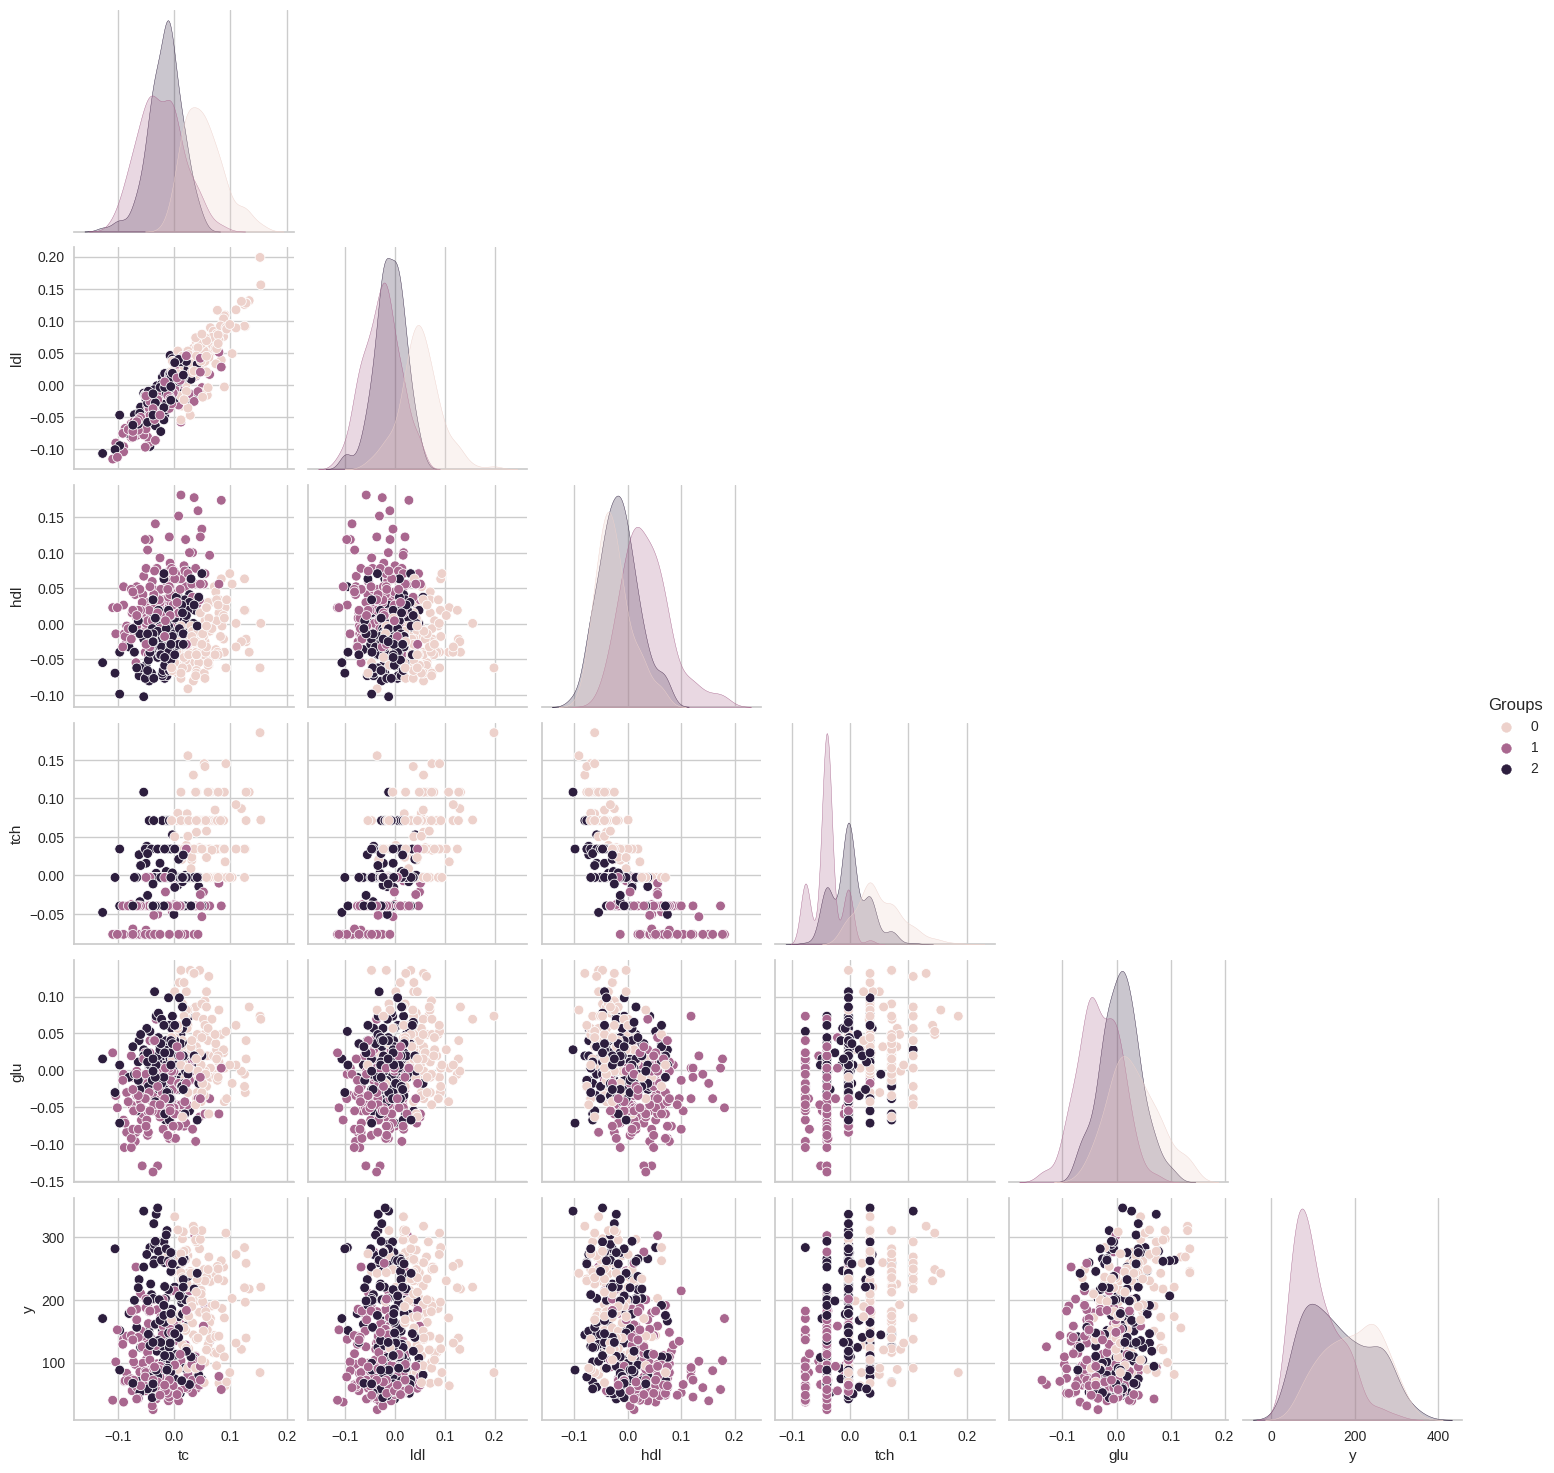

In [90]:
sns.pairplot(colesterol,
             hue="Groups",
             corner=True);

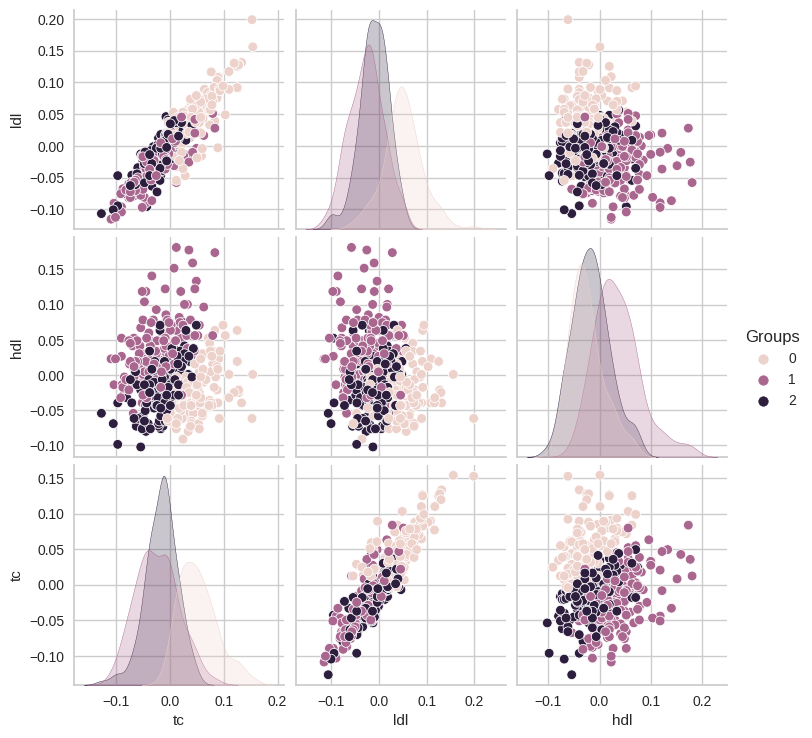

In [92]:
sns.pairplot(colesterol,
             hue="Groups",
             x_vars=["tc", "ldl", "hdl"],
             y_vars=["ldl", "hdl", 'tc'],
);

Text(0.5, 0, 'BMI')

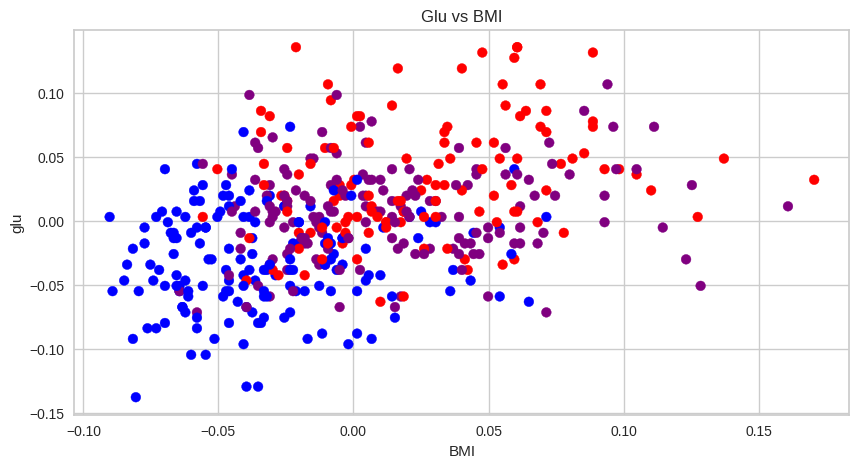

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

categorias = {0:'red', 1:'blue', 2:'purple'}

ax.scatter(dataset['bmi'] , dataset['glu']  , c=dataset['Groups'].apply(lambda x:categorias[x]))

plt.title('Glu vs BMI')
plt.ylabel('glu')
plt.xlabel('BMI')

Text(0.5, 0, 'LDL')

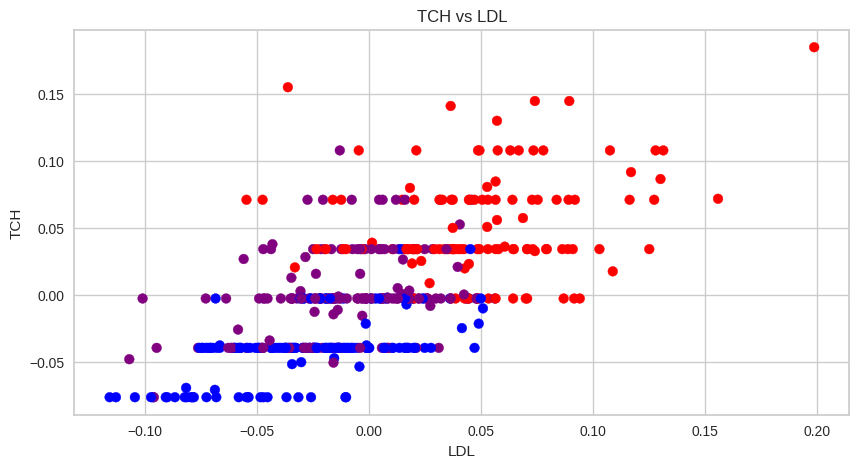

In [65]:
fig, ax = plt.subplots(figsize=(10,5))

categorias = {0:'red', 1:'blue', 2:'purple'}

ax.scatter(dataset['ldl'] , dataset['tch']  , c=dataset['Groups'].apply(lambda x:categorias[x]))

plt.title('TCH vs LDL')
plt.ylabel('TCH')
plt.xlabel('LDL')

Text(0.5, 0, 'LDL')

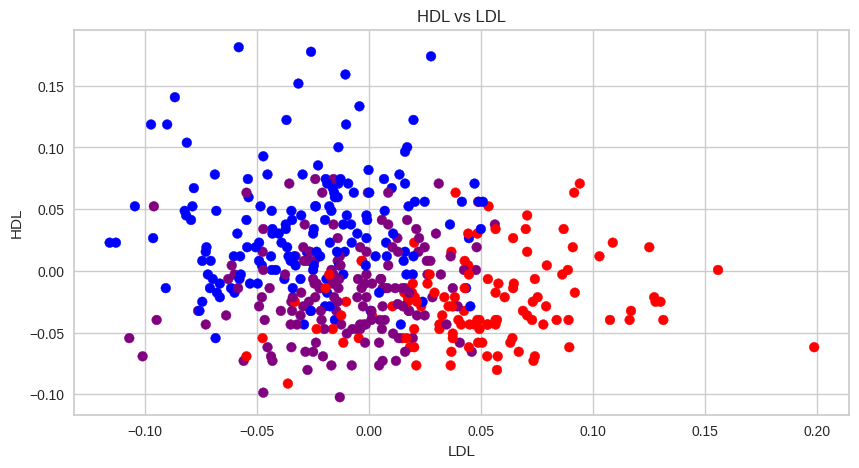

In [85]:
fig, ax = plt.subplots(figsize=(10,5))

categorias = {0:'red', 1:'blue', 2:'purple'}

ax.scatter(dataset['ldl'] , dataset['hdl']  , c=dataset['Groups'].apply(lambda x:categorias[x]))

plt.title('HDL vs LDL')
plt.ylabel('HDL')
plt.xlabel('LDL')

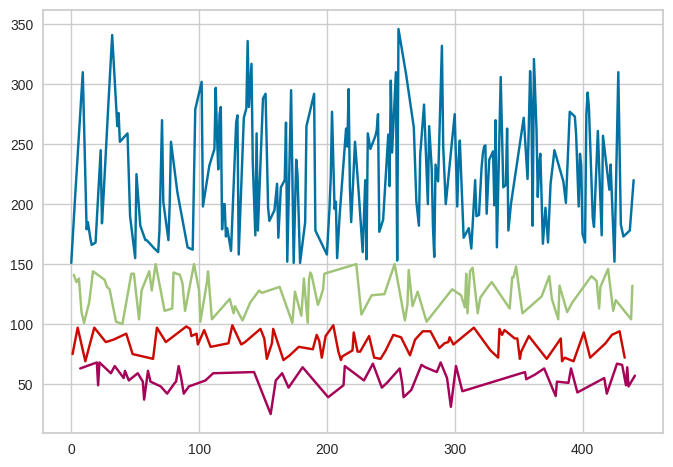

In [102]:
dataset['y'][dataset['y'] > 150].plot() ;
dataset['y'][(dataset['y'] >= 100) & (dataset['y'] <= 150)].plot() ;
dataset['y'][(dataset['y'] >= 69) & (dataset['y'] <= 99)].plot() ;
dataset['y'][dataset['y'] < 69].plot() ;

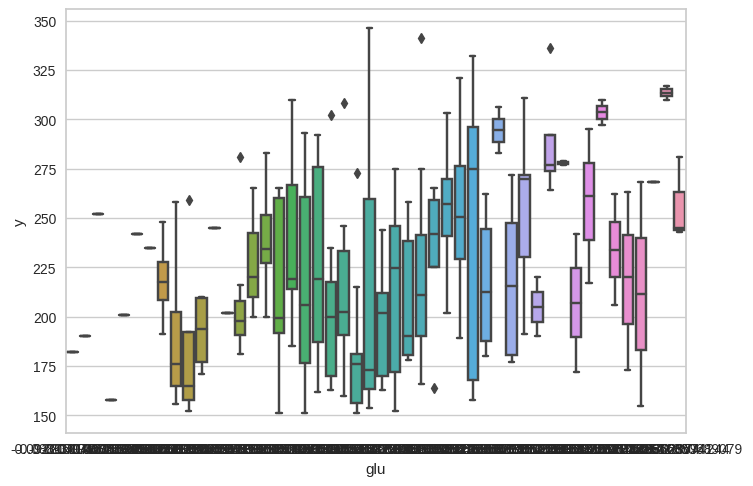

In [116]:
diabetico = dataset[dataset['y'] > 150]
prediabetico = dataset[(dataset['y'] >= 100) & (dataset['y'] <= 150)]
eudiabetico = dataset[(dataset['y'] >= 69) & (dataset['y'] <= 99)]
hipoglicemia = dataset[dataset['y'] < 69]

sns.boxplot(x = 'glu', y = 'y', data = diabetico) ;

<Axes: >

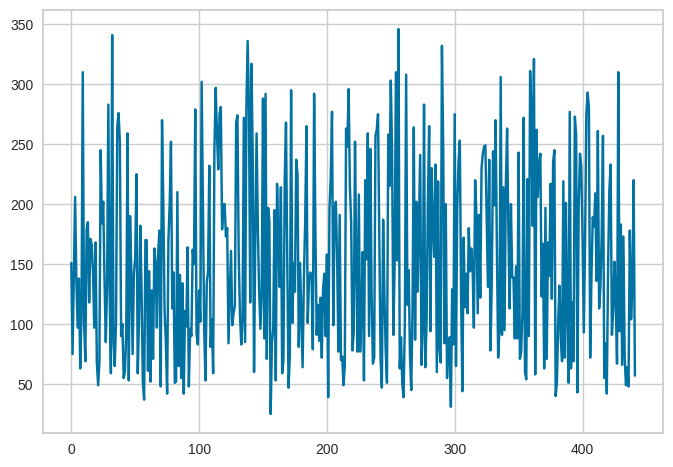

In [95]:
colesterol['y'].plot()

### KMeans e Elbow Method

In [67]:
y = dataset['Groups'].values
y

array([2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2,

In [68]:
dataset2 = dataset[['age', 'sex', 'bmi', 'glu', 'Groups']]

In [69]:
dataset2.head()

age       sex       bmi       glu  Groups
0  0.038076  0.050680  0.061696 -0.017646       2
1 -0.001882 -0.044642 -0.051474 -0.092204       1
2  0.085299  0.050680  0.044451 -0.025930       2
3 -0.089063 -0.044642 -0.011595 -0.009362       2
4  0.005383 -0.044642 -0.036385 -0.046641       1

In [70]:
X = dataset2.iloc[:, 0:4].values
X

array([[ 0.03807591,  0.05068012,  0.06169621, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 ,  0.00306441]])

In [71]:
y = dataset2.iloc[:, 4].values
y

array([2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2,

In [72]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [73]:
kmeans_normalizados = KMeans(n_clusters=3, algorithm="elkan")
kmeans_normalizados.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(algorithm='elkan', n_clusters=3)

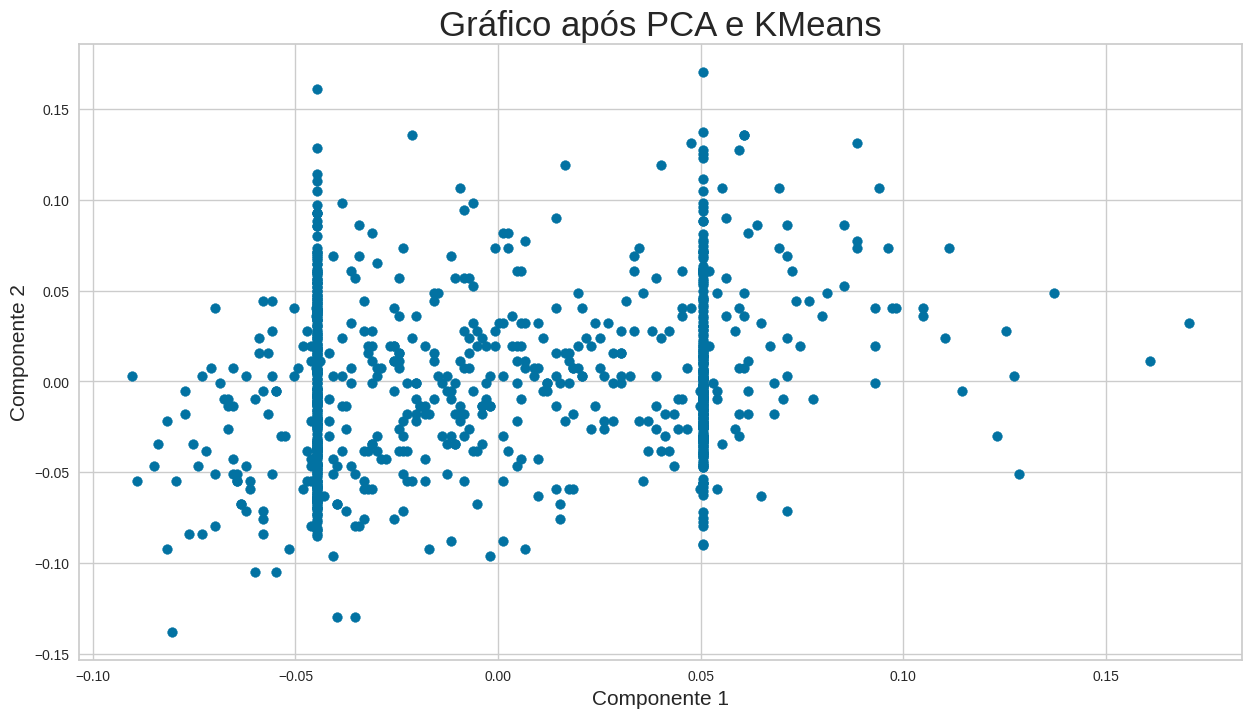

In [74]:
plt.figure(figsize=(15,8))

plt.scatter(x = X[:,1:3], y = X[:, 2:4])
plt.title("Gráfico após PCA e KMeans", fontsize = 25)
plt.xlabel("Componente 1", fontsize = 15)
plt.ylabel("Componente 2", fontsize = 15)

plt.grid(True)
plt.show()

In [75]:
centroides = kmeans_normalizados.cluster_centers_
rotulos = kmeans_normalizados.labels_

In [76]:
centroides, rotulos

(array([[ 0.01852074,  0.05068012,  0.01138633,  0.01880442],
        [-0.04262233, -0.02484404, -0.03872272, -0.04284925],
        [ 0.01672098, -0.04464164,  0.02260919,  0.01655764]]),
 array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2,
        0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2,
        0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0,
        0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1,
        0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0,
        0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2,
        0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0,
        1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0

In [77]:
grafico1 = px.scatter(x = X[:,2], y = X[:,3], color=rotulos)
grafico2 = px.scatter(x = centroides[:,1], y = centroides[:,3], size = [7, 7, 7])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/usr/local/lib/python3.10/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `loca

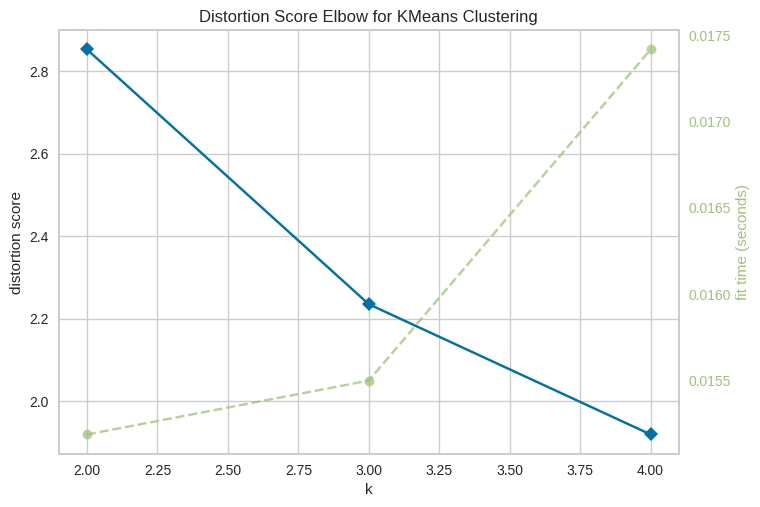

In [78]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(kmeans_normalizados)
visualizer = KElbowVisualizer(model, k=4, metric="distortion")

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() ;